# Part 1

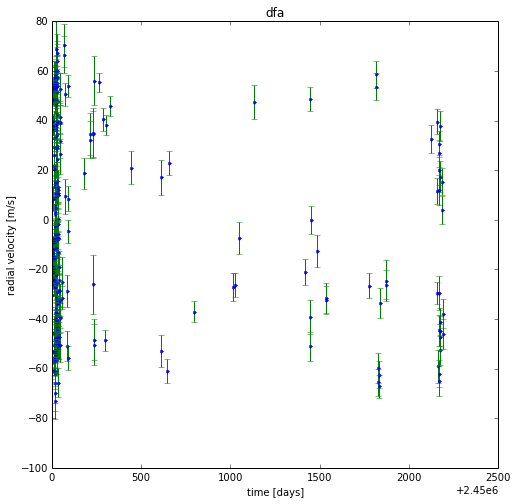

In [1]:
#import modules
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline


#read in the data
with open('data/UID_0113357_RVC_001.tbl') as rawfile:
    # Read and ignore header lines
    header1 = rawfile.readline()
    header2 = rawfile.readline()
    header3 = rawfile.readline()

    data = [] # list to store line in
    
    for line in rawfile:
        line = line.strip()
        data.append(line)

#arrays to store data in
time = np.zeros(len(data))
radv = np.zeros(len(data))
eradv = np.zeros(len(data))

#number of datepoints
NDP = time.shape[0]

#storing the data
for x in range(len(data)):
    lin=[]
    lin=data[x].split()
    time[x] = lin[0]
    radv[x] = lin[1]
    eradv[x] = lin[2]
    
#plot the data
plt.figure(figsize=(8,8))
plt.title('dfa')
plt.plot(time,radv, '.')
plt.errorbar(time, radv, yerr=eradv, fmt=None)
plt.xlabel('time [days]')
plt.ylabel('radial velocity [m/s]')

In [2]:
period = np.logspace(0, 2,10000)
linelength=np.zeros(period.shape[0])
for p in range(period.shape[0]):
    #generate phases and store phases in orderd
    phase = np.zeros(NDP)
    phase = ( time % period[p]) / period[p]
    #for i in range(NDP):
    #    phase[i] = (time[i] % period[p]) / period[p]

    # find out the order of the phase elemnts    
    ophase=phase.argsort()

    # sort phase by value sorted phase=sphase
    sphase = np.zeros(NDP)
    sphase = phase[ophase]

    #sort velocity by phase in sorted velocity=sradv
    sradv = radv[ophase]

    #evaluate line length
    linelength[p] = sum(np.sqrt(np.diff(sphase)**2+np.diff(sradv)**2))

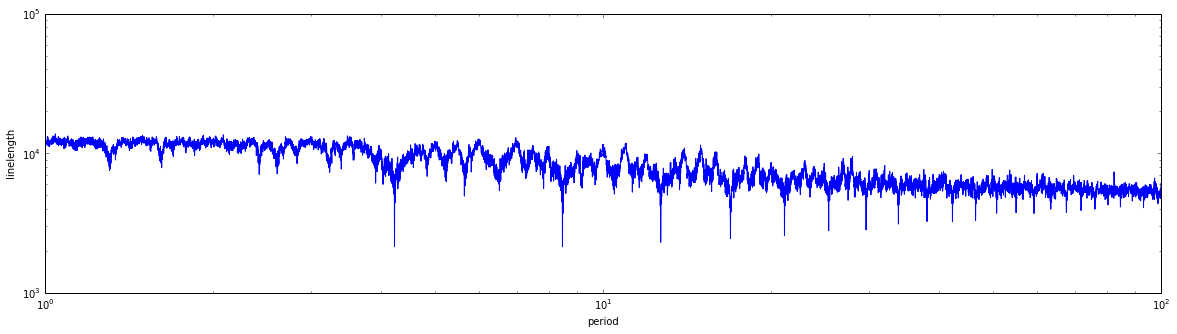

In [3]:
plt.figure(figsize=(20,5))
plt.plot(period,linelength) #'.', markersize=1)
plt.titel = 'linelength vs. period'

plt.xscale('log')
plt.xlabel('period')

plt.yscale('log')
plt.ylabel('linelength')

In [4]:
# the other minima are minima of a higher order, meaning the phase multiplied by n*pi with n being a natural number.

In [5]:
# from the plot we can see that the first clear minimum is by a period smaller than 5
mask=min(linelength[period<5])
minperiod=period[linelength==mask][0]
print('The minimal period T: '+ str(minperiod))

The minimal period T: 4.23119115611


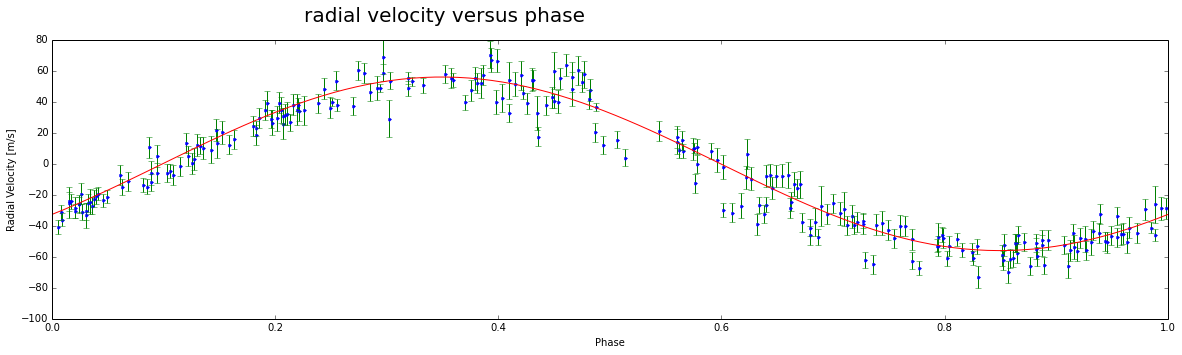

Amplitude a [m/s] = -55.9961478122 +/- 0.0892066171102
Period T [day] =: 4.23119115611


In [6]:
#the a
minphase = ( time % minperiod) / minperiod

def sinus(x, a, b):
    return(a * np.sin( 2 * np.pi * x + b))

#plot data
#plt.title=('radial velocity vs. time by a period of:'+str(minperiod))
fig = plt.figure(figsize=(20,5))
fig.text(0.3,0.95,'radial velocity versus phase', fontsize=20)
plt.plot(minphase,radv,'.')
plt.errorbar(minphase, radv, eradv, fmt=None)
plt.xlabel('Phase')
plt.ylabel('Radial Velocity [m/s]')

#fit data
popt, pcov = curve_fit(sinus, minphase, radv, absolute_sigma=True) # using the absolute errors!

#plot fitted curve
xfine = np.linspace(0., 1., 100)
plt.plot(xfine, sinus(xfine, *popt), 'r-')

plt.show()

print("Amplitude a [m/s] =", popt[0], "+/-", pcov[0,0]**0.5)
print('Period T [day] =: '+ str(minperiod))

# Part 2

In [7]:
#set all relevant parameters
T = float(minperiod)*24*60*60 #period in seconds
Ms = 1.989*10**30 # kg Mass of the star
Kobs = -popt[0] # m/s 
eKobs = pcov[0,0]**0.5 #m/s
G = 6.67384 * 10**-11 # m^3/(kg*s^2)
Mj = 1.898*10**27 # kg

In [8]:
#compute q
q = ((T/(2*np.pi*G*Ms))**(1/3))*Kobs
Mp=q*Ms/Mj # Mass of the planet
print('Mass of the object [kg] = ',Mp)

Mass of the object [kg] =  0.445750708213


so the object is likely a planet

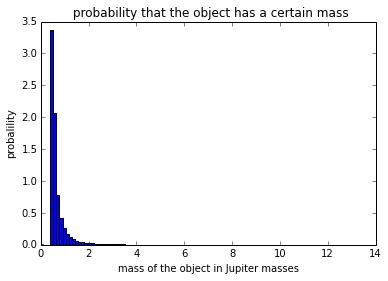

In [9]:
S=1000000 # samples

mcMs = np.random.uniform(low=0.5*Ms, high=1.5*Ms, size=S)
mcCosi = np.random.uniform(low=0,high=1, size=S)
mci = np.arccos(mcCosi)
mcKobs = np.random.normal(Kobs,eKobs,S)

mcq = ((T/(2*np.pi*G*mcMs))**(1/3))*mcKobs/np.sin(mci)
mcMp=mcq*Ms/Mj # Mass of the pmcMp

hist = plt.hist(mcMp,bins=100, normed=True, range=(0,13))
plt.xlabel('mass of the object in Jupiter masses')
plt.title(' probability that the object has a certain mass')
plt.ylabel('probalility')

In [10]:
prob = mcMp[mcMp<13].shape[0]/mcMp.shape[0]
print('the numerical probalility, that the object is a planet is:' , prob*100, '%')

the numerical probalility, that the object is a planet is: 99.9428 %


In [11]:
if (1-prob)<0.682689492137086:
    print('and therefore we have a 1-sigma confidance that the object is a planet')
if (1-prob)>=0.682689492137086:
    print('not in the 1-sigma area')

and therefore we have a 1-sigma confidance that the object is a planet


In [12]:
print('mass of the planet is: (', np.mean(mcMp),'+/-',np.std(mcMp),')*Jupitermass')

mass of the planet is: ( 0.712879213677 +/- 0.996583053165 )*Jupitermass
